<a href="https://colab.research.google.com/github/tvisha03/Machine-learning-projects/blob/main/Medical_Insurance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [23]:

df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


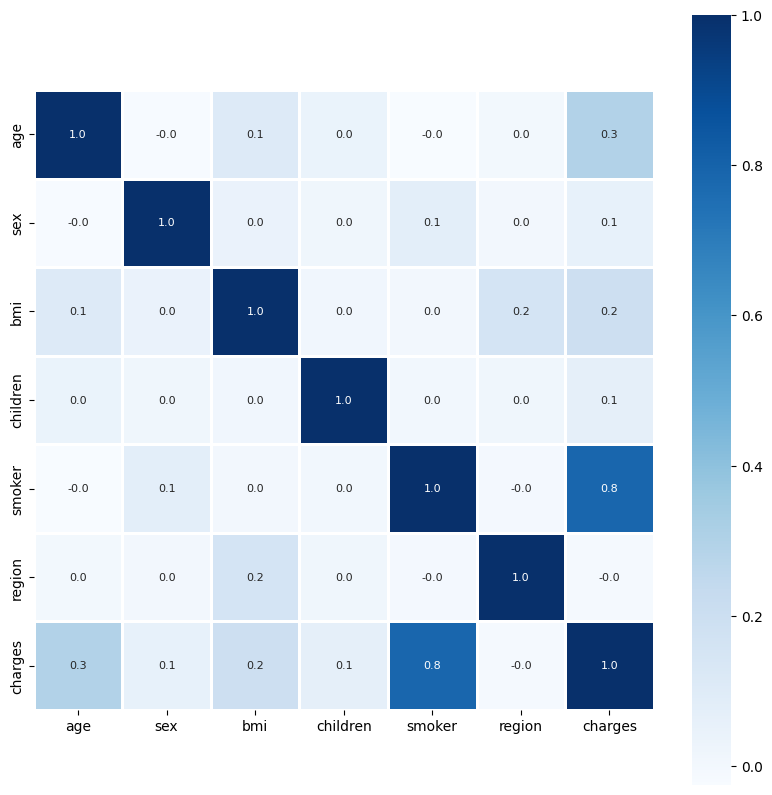

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, linewidths=1, cmap='Blues' , cbar=True)
plt.show()


In [34]:
import xgboost as xgb

In [35]:
model = xgb.XGBRegressor()


In [36]:
X=df.drop('charges',axis=1)
y=df['charges']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
training_data_prediction = model.predict(X_train)
training_data_r2 = r2_score(y_train, training_data_prediction)
print('R squared value = ', training_data_r2)

R squared value =  0.9941387967942534


In [40]:
test_data_prediction = model.predict(X_test)
test_data_r2 = r2_score(y_test, test_data_prediction)
print('R squared value = ', test_data_r2)

R squared value =  0.8501678977480663
